# **California Housing EDA**

## **1. Introduction**

### **What dataset are you looking at?**
This analysis examines the California Housing Prices dataset, derived from median house prices for California districts based on the 1990 census. The dataset, originally published by Cam Nugent on Kaggle and widely used in the machine learning community, represents one of the most popular benchmark datasets for regression analysis and predictive modeling.

### **Where/how was it created?**
The dataset originates from the StatLib repository and is based on the 1990 California census data. It consists of 20,640 samples and 8 feature variables, with each record representing aggregated housing information for a specific census block group (district) within California.
Data Collection Methodology:
The dataset was compiled through systematic census data collection, where information was gathered at the block group level - the smallest geographical unit for which the U.S. Census Bureau publishes sample data. Each record represents statistical aggregations (medians and averages) for households within these geographic districts.
Key Features Included:
The dataset contains 8 primary features: MedInc (median income), HouseAge, AveRooms (average rooms), AveBedrms (average bedrooms), Population, and AveOccup (average occupancy), along with geographical proximity information and the target variable - median house value.

### **What questions will be asked?**
This dataset enables investigation of multiple research questions relevant to real estate analytics, urban planning, and socioeconomic studies:

Primary Research Questions:

- Price Prediction Modeling: Can we build an accurate machine learning model to predict median housing prices based on demographic and housing characteristics?

- Feature Importance Analysis: Which factors have the strongest correlation with housing prices? How does median income correlate with housing values across different districts?

- Geographic Price Variations: How do housing prices vary across different regions of California, and what patterns emerge based on proximity to the ocean or urban centers?

- Socioeconomic Housing Relationships: What is the relationship between population density, average household size, and housing affordability?

Secondary Research Questions:

- Housing Density Analysis: How do average rooms per household and average occupancy rates affect property values?

- Age and Value Correlation: Does the age of housing stock significantly impact median home values across districts?

- Market Segmentation: Can we identify distinct housing market segments based on demographic and structural characteristics?

- Outlier Investigation: What districts represent outliers in terms of price relative to their characteristics, and what might explain these anomalies?

This dataset serves as an excellent foundation for exploring regression techniques, feature engineering, data preprocessing, and understanding the complex relationships between socioeconomic factors and housing markets in one of America's most dynamic real estate environments.

## **2. Cleaning and Organizing Data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data from the .csv file
file_path = 'data/housing.csv'
df = pd.read_csv(file_path)

df_info = df.info()
df_preview = df.head()

df.shape, df.columns, df_preview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


((20640, 10),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity'],
       dtype='object'),
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0       322.0       126.0         8.3252            452600.0        NEAR BAY  
 1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
 2       496.0       177.0         7.2574            352100.0        NEAR

### Checking for missing values

In [3]:
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

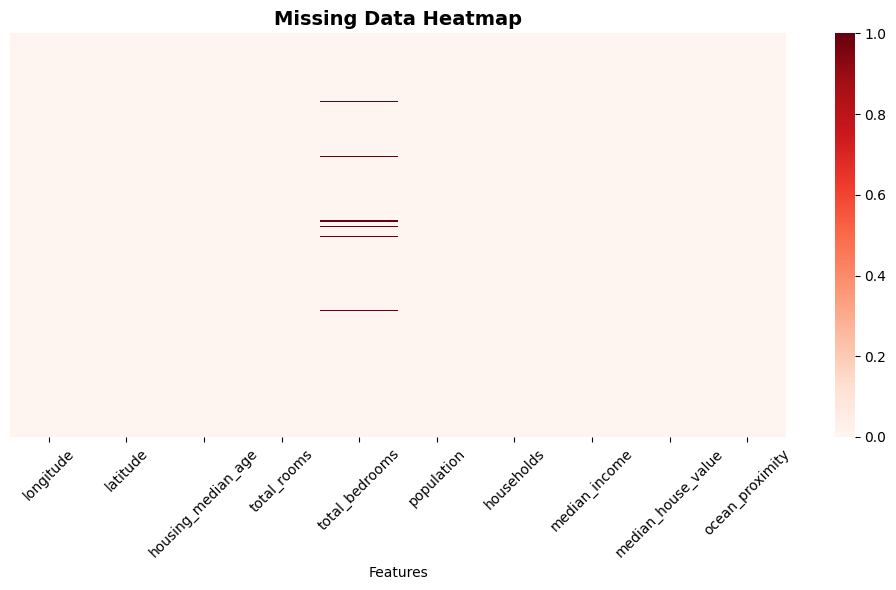

Missing values per column:
longitude: 0 (0.0%)
latitude: 0 (0.0%)
housing_median_age: 0 (0.0%)
total_rooms: 0 (0.0%)
total_bedrooms: 207 (1.0%)
population: 0 (0.0%)
households: 0 (0.0%)
median_income: 0 (0.0%)
median_house_value: 0 (0.0%)
ocean_proximity: 0 (0.0%)


In [4]:
# Check for missing values with better visualization
plt.figure(figsize=(10, 6))

# Create heatmap for missing values
sns.heatmap(df.isnull(), 
            cmap='Reds', 
            cbar=True, 
            yticklabels=False,
            xticklabels=True)

plt.title('Missing Data Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print missing data summary
print("Missing values per column:")
missing_summary = df.isnull().sum()
for col, count in missing_summary.items():
    if count > 0:
        print(f"{col}: {count} ({count/len(df)*100:.1f}%)")
    else:
        print(f"{col}: 0 (0.0%)")

In [5]:
print("Missing:", df['total_bedrooms'].isnull().sum())

Missing: 207


- Only total_bedrooms has missing values (207 rows ≈ 1.00%). 
- No clustering by row (randomly scattered), it's likely Missing at Random(MAR) due to incomplete data entry.
- No other variable has missing values and no clear correlation to other features.




### Strategies for Imputation of Deficiencies

In [6]:

# Checking skewness
skew = df['total_bedrooms'].skew()
print(f"Skewness: {skew:.2f}")

Skewness: 3.46


Skew > +1 or < -1 highly skewed, we need to use MEDIAN for imputation of total_bedrooms (3.46)

In [7]:
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

C:\Users\BojanIvanovski\AppData\Local\Temp\ipykernel_13764\2993604379.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


### Definition of Rules & Visualization of Violations

#### Definition of rules to check for Bad Data:
- housing_median_age should be between 0–100

- total_rooms, total_bedrooms, households, population > 0

- median_income >= 0

- median_house_value >= 0

In [8]:
df_housing = df.copy()


# Rule-based violations
violations = {
    'total_rooms': df_housing[df_housing['total_rooms'] <= 0],
    'total_bedrooms': df_housing[df_housing['total_bedrooms'] <= 0],
    'households': df_housing[df_housing['households'] <= 0],
    'population': df_housing[df_housing['population'] <= 0],
    'median_income': df_housing[df_housing['median_income'] < 0],
    'median_house_value': df_housing[df_housing['median_house_value'] < 0],
    'bedrooms > rooms': df_housing[df_housing['total_bedrooms'] > df_housing['total_rooms']],
}

# Counting violations
for col, rows in violations.items():
    print(f"{col}: {len(rows)} violations")


total_rooms: 0 violations
total_bedrooms: 0 violations
households: 0 violations
population: 0 violations
median_income: 0 violations
median_house_value: 0 violations
bedrooms > rooms: 5 violations


#### Repairing Violations

In [9]:
# For bedrooms > rooms, calculate realistic bedroom count
# Typical bedroom-to-room ratio in housing is around 20-30%
valid_data = df_housing[df_housing['total_bedrooms'] <= df_housing['total_rooms']]
typical_bedroom_ratio = (valid_data['total_bedrooms'] / valid_data['total_rooms']).median()

print(f"\nTypical bedroom-to-room ratio: {typical_bedroom_ratio:.3f}")

mask_bedrooms = df_housing['total_bedrooms'] > df_housing['total_rooms']
df_housing.loc[mask_bedrooms, 'total_bedrooms'] = (
    df_housing.loc[mask_bedrooms, 'total_rooms'] * typical_bedroom_ratio
).round().astype(int)

print(f"Fixed {mask_bedrooms.sum()} bedroom violations using ratio {typical_bedroom_ratio:.3f}")


Typical bedroom-to-room ratio: 0.203
Fixed 5 bedroom violations using ratio 0.203


### Outlier Detection and Analysis

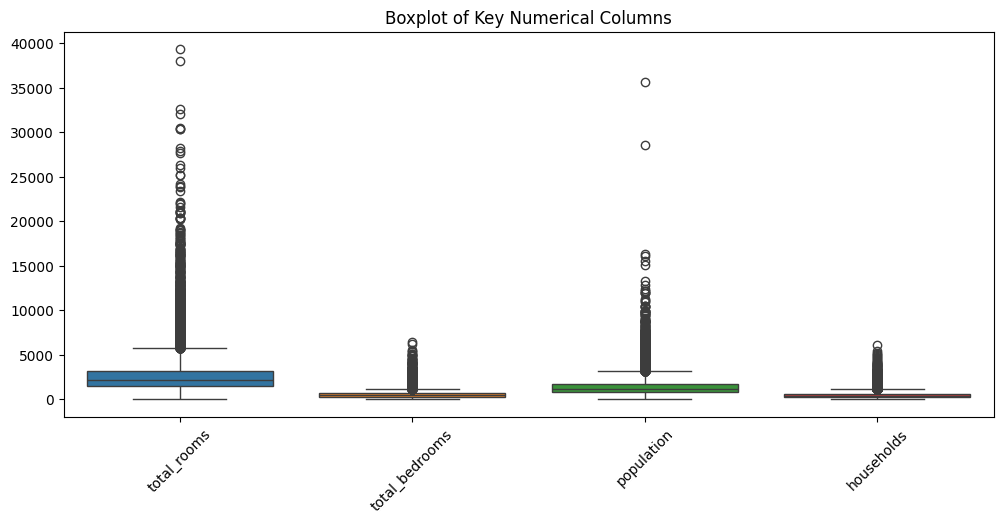

In [10]:
#Outlier visualization
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_housing[['total_rooms', 'total_bedrooms', 'population', 'households']])
plt.title("Boxplot of Key Numerical Columns")
plt.xticks(rotation=45)
plt.show()


In [11]:
numeric_cols = df_housing.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df_housing[col].quantile(0.25)
    Q3 = df_housing[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_housing[(df_housing[col] < lower_bound) | (df_housing[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


longitude: 0 outliers
latitude: 0 outliers
housing_median_age: 0 outliers
total_rooms: 1287 outliers
total_bedrooms: 1306 outliers
population: 1196 outliers
households: 1220 outliers
median_income: 681 outliers
median_house_value: 1071 outliers


#### Outlier Analysis Discussion
We applied the IQR (Interquartile Range) method to all numerical columns in the dataset to detect outliers. The results indicate that outliers are present in most housing-related variables, particularly in:

- total_rooms (1,287 outliers)

- total_bedrooms (1,306 outliers)

- population (1,196 outliers)

- households (1,220 outliers)

- median_income (681 outliers)

- median_house_value (1,071 outliers)

By contrast, no outliers were detected in longitude, latitude, and housing_median_age.

These findings suggest that extreme values are common in demographic and structural attributes of housing units. For example:

1. total_rooms and total_bedrooms have long upper tails, likely due to large apartment complexes or luxury properties.

2. population and households also show large values in certain regions, which may reflect high-density urban housing.

3. median_income and median_house_value outliers reflect economic disparities between regions, such as coastal vs. inland California.

These outliers may be genuine and represent real-world extremes, especially in large-scale housing datasets.

## **3. Visualizations**

### Chart 1: Geographic Distribution of Housing Prices

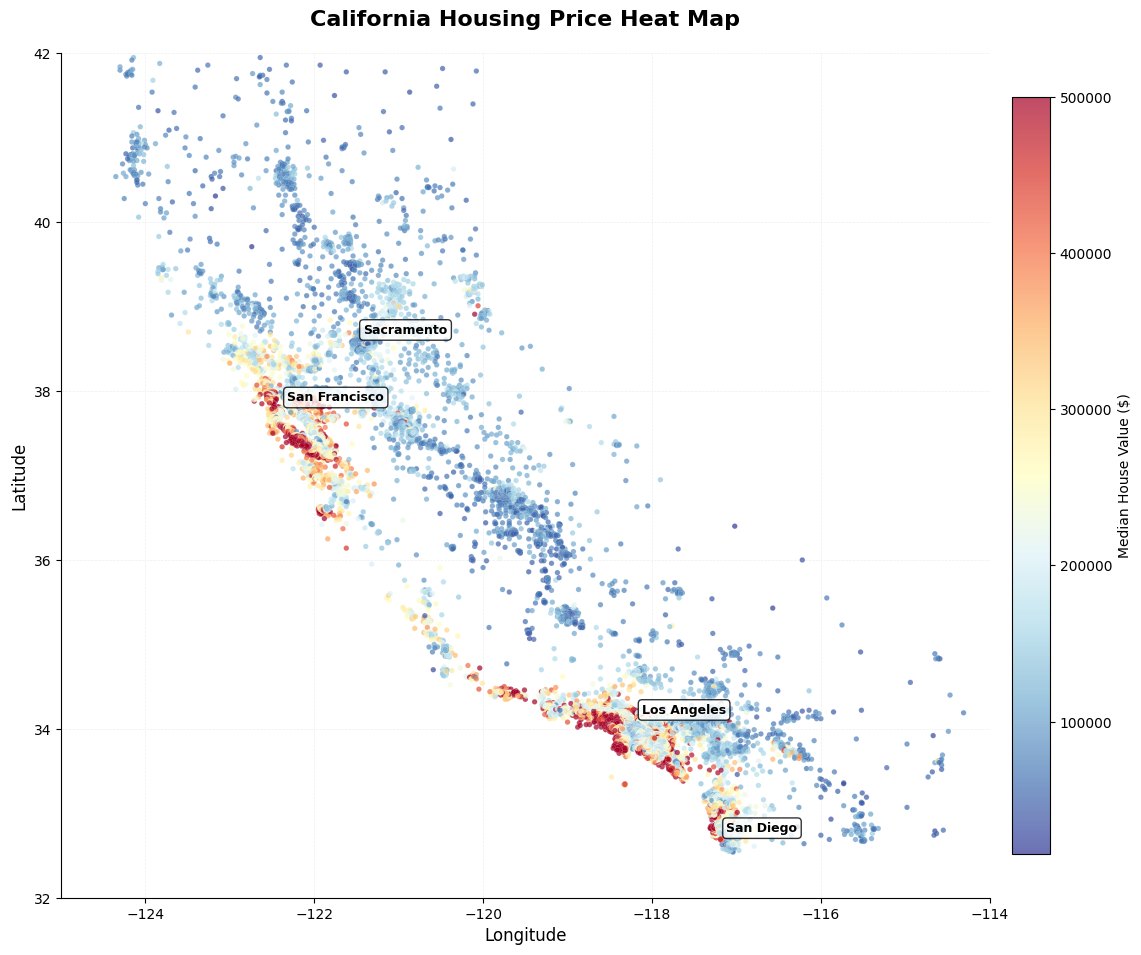

In [ ]:
import numpy as np

plt.figure(figsize=(12, 10))

# Create the scatter plot
scatter = plt.scatter(df_housing['longitude'], df_housing['latitude'], 
                     c=df_housing['median_house_value'], 
                     cmap='RdYlBu_r',  # Red-Yellow-Blue reversed for intuitive heat mapping
                     alpha=0.7, 
                     s=15,
                     edgecolors='white',
                     linewidth=0.1)

# Customize the plot
plt.colorbar(scatter, label='Median House Value ($)', shrink=0.8, pad=0.02)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('California Housing Price Heat Map', fontsize=16, fontweight='bold', pad=20)

# Add grid with map-like styling
plt.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)

# Set aspect ratio to make it look more geographically accurate
plt.gca().set_aspect('equal', adjustable='box')

# Add some geographic context with annotations for major areas
# Approximate coordinates for major CA cities
major_cities = {
    'San Francisco': (-122.4, 37.8),
    'Los Angeles': (-118.2, 34.1),
    'San Diego': (-117.2, 32.7),
    'Sacramento': (-121.5, 38.6)
}

for city, (lon, lat) in major_cities.items():
    plt.annotate(city, (lon, lat), xytext=(5, 5), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8),
                fontsize=9, fontweight='bold')

# Set map-like boundaries
plt.xlim(-125, -114)
plt.ylim(32, 42)

# Remove top and right spines for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

This heat map reveals California's housing price geography with coastal areas having premium values. The San Francisco Bay Area and coastal Southern California show the highest prices (red/orange), while inland Central Valley and desert regions remain significantly more affordable (blue tones), demonstrating a clear coastal-inland price divide driven by proximity to employment centers and ocean access.

### Chart 2: Housing Prices by Ocean Proximity

C:\Users\BojanIvanovski\AppData\Local\Temp\ipykernel_13764\2831724081.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=df_housing, x='ocean_proximity', y='median_house_value',


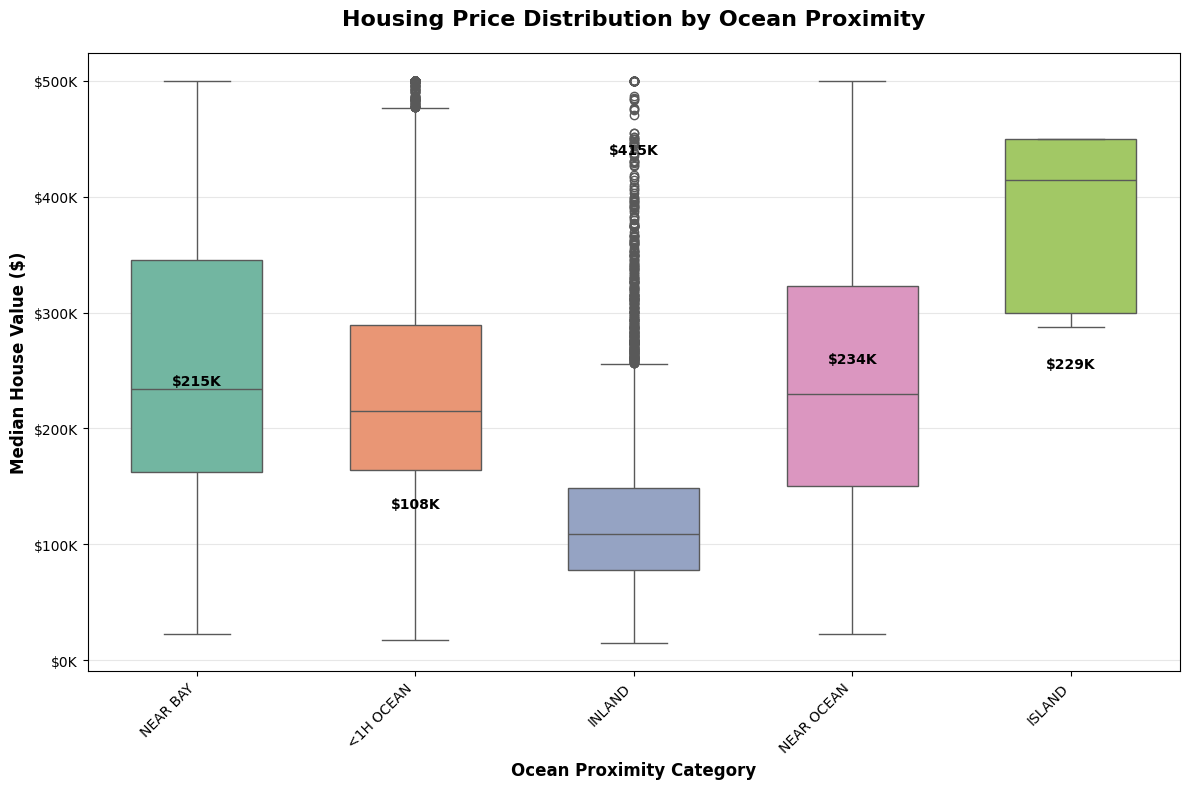


Median prices by ocean proximity:
<1H OCEAN: $214,850 (n=9136)
INLAND: $108,500 (n=6551)
ISLAND: $414,700 (n=5)
NEAR BAY: $233,800 (n=2290)
NEAR OCEAN: $229,450 (n=2658)


In [23]:
plt.figure(figsize=(12, 8))

# Create enhanced boxplot with better styling
box_plot = sns.boxplot(data=df_housing, x='ocean_proximity', y='median_house_value', 
                       palette='Set2', width=0.6)

# Customize the plot
plt.title('Housing Price Distribution by Ocean Proximity', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ocean Proximity Category', fontsize=12, fontweight='bold')
plt.ylabel('Median House Value ($)', fontsize=12, fontweight='bold')

# Format y-axis to show values in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, alpha=0.3, axis='y')

# Add median line annotations
medians = df_housing.groupby('ocean_proximity')['median_house_value'].median()
for i, (category, median_val) in enumerate(medians.items()):
    plt.text(i, median_val + 20000, f'${median_val/1000:.0f}K', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# Improve layout
plt.tight_layout()
plt.show()

# Additional statistics
print("\nMedian prices by ocean proximity:")
for category, median_val in medians.items():
    count = len(df_housing[df_housing['ocean_proximity'] == category])
    print(f"{category}: ${median_val:,.0f} (n={count})")

This boxplot demonstrates how water proximity drives housing values, with island properties commanding the highest prices despite small sample size variability. A clear hierarchy emerges from inland areas (lowest prices) to near-ocean and bay properties (highest prices), showing that coastal access serves as a consistent premium factor across California's real estate market.

### Chart 3: Income vs Housing Value Relationship

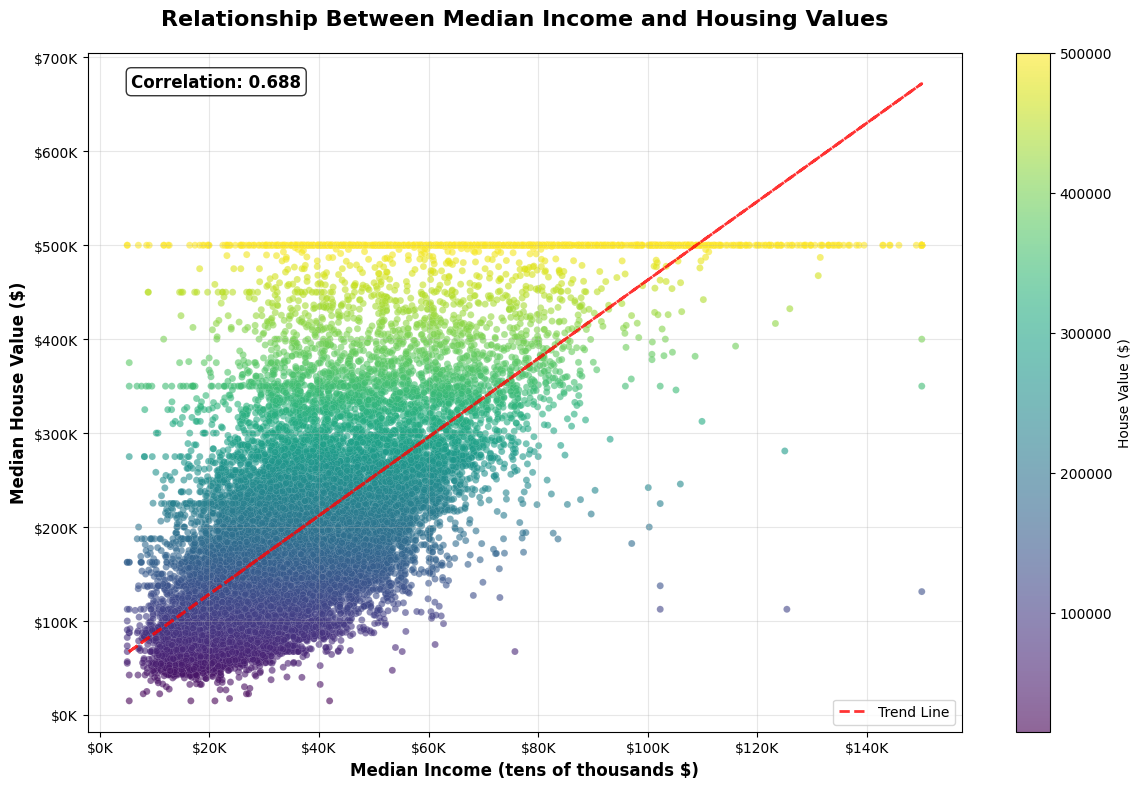

In [24]:
plt.figure(figsize=(12, 8))

# Create scatter plot with density-based coloring
plt.scatter(df_housing['median_income'], df_housing['median_house_value'], 
           alpha=0.6, s=25, c=df_housing['median_house_value'], 
           cmap='viridis', edgecolors='white', linewidth=0.1)

plt.xlabel('Median Income (tens of thousands $)', fontsize=12, fontweight='bold')
plt.ylabel('Median House Value ($)', fontsize=12, fontweight='bold')
plt.title('Relationship Between Median Income and Housing Values', fontsize=16, fontweight='bold', pad=20)

# Format axes
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x*10:.0f}K'))

# Add trend line
z = np.polyfit(df_housing['median_income'], df_housing['median_house_value'], 1)
p = np.poly1d(z)
plt.plot(df_housing['median_income'], p(df_housing['median_income']), 
         "r--", alpha=0.8, linewidth=2, label=f'Trend Line')

# Add correlation coefficient
correlation = df_housing['median_income'].corr(df_housing['median_house_value'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.colorbar(label='House Value ($)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

This scatter plot shows a strong positive correlation (0.688) between median income and housing values. There appears to be a price ceiling effect around $500K regardless of income levels above $100K.

### Chart 4: Housing Age Distribution and Price Impact

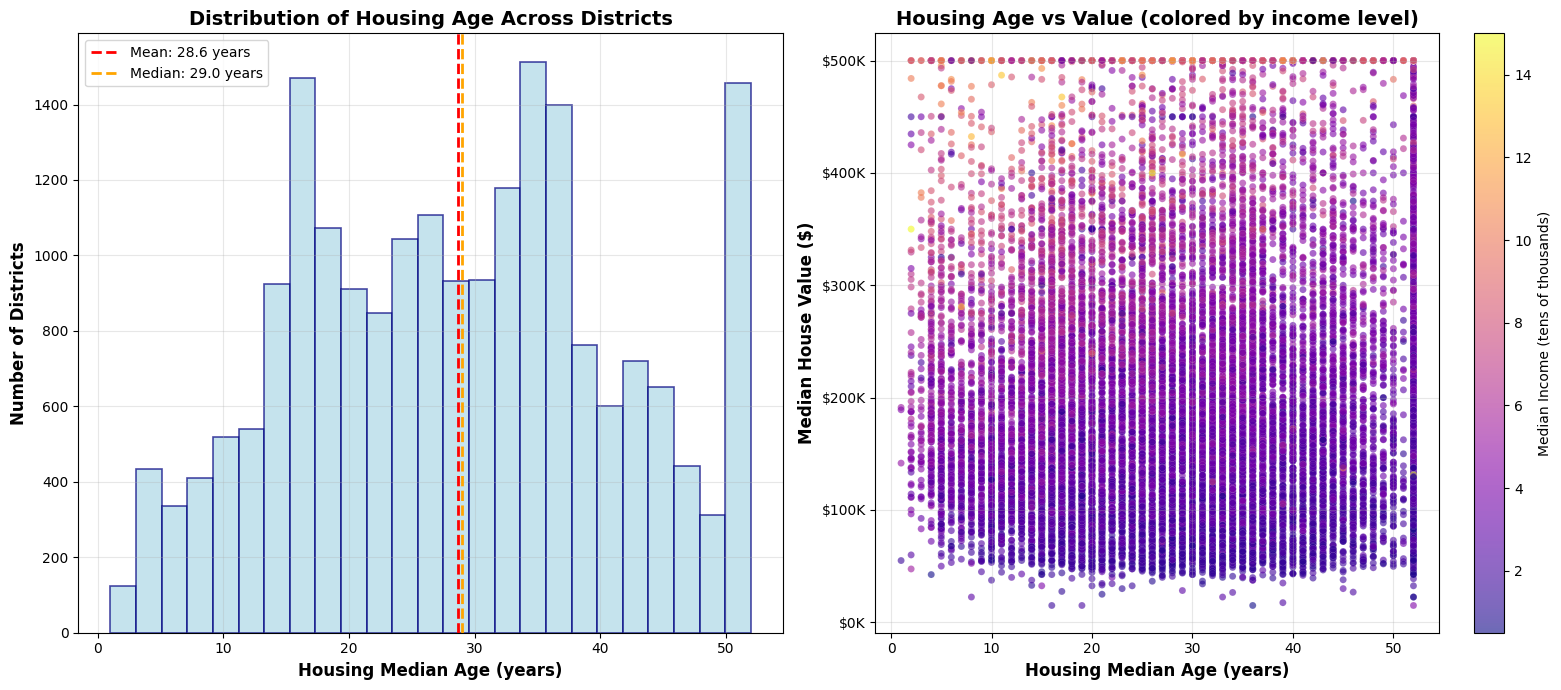

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Age distribution histogram
ax1.hist(df_housing['housing_median_age'], bins=25, color='lightblue', 
         alpha=0.7, edgecolor='navy', linewidth=1.2)
ax1.set_xlabel('Housing Median Age (years)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Districts', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Housing Age Across Districts', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add mean and median lines
mean_age = df_housing['housing_median_age'].mean()
median_age = df_housing['housing_median_age'].median()
ax1.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f} years')
ax1.axvline(median_age, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_age:.1f} years')
ax1.legend()

# Age vs Price scatter plot
scatter = ax2.scatter(df_housing['housing_median_age'], df_housing['median_house_value'], 
                     alpha=0.6, s=25, c=df_housing['median_income'], 
                     cmap='plasma', edgecolors='white', linewidth=0.1)
ax2.set_xlabel('Housing Median Age (years)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Median House Value ($)', fontsize=12, fontweight='bold')
ax2.set_title('Housing Age vs Value (colored by income level)', fontsize=14, fontweight='bold')

# Format y-axis
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.colorbar(scatter, ax=ax2, label='Median Income (tens of thousands)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Most California housing stock is 15-40 years old, with property values more strongly influenced by location and income levels than by building age. Newer properties don't necessarily command higher prices when location factors are considered.

### Chart 5: Target Variable (Median House Value) Analysis

C:\Users\BojanIvanovski\AppData\Local\Temp\ipykernel_13764\1128048541.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([df_housing[df_housing['price_range'] == range_]['median_house_value']


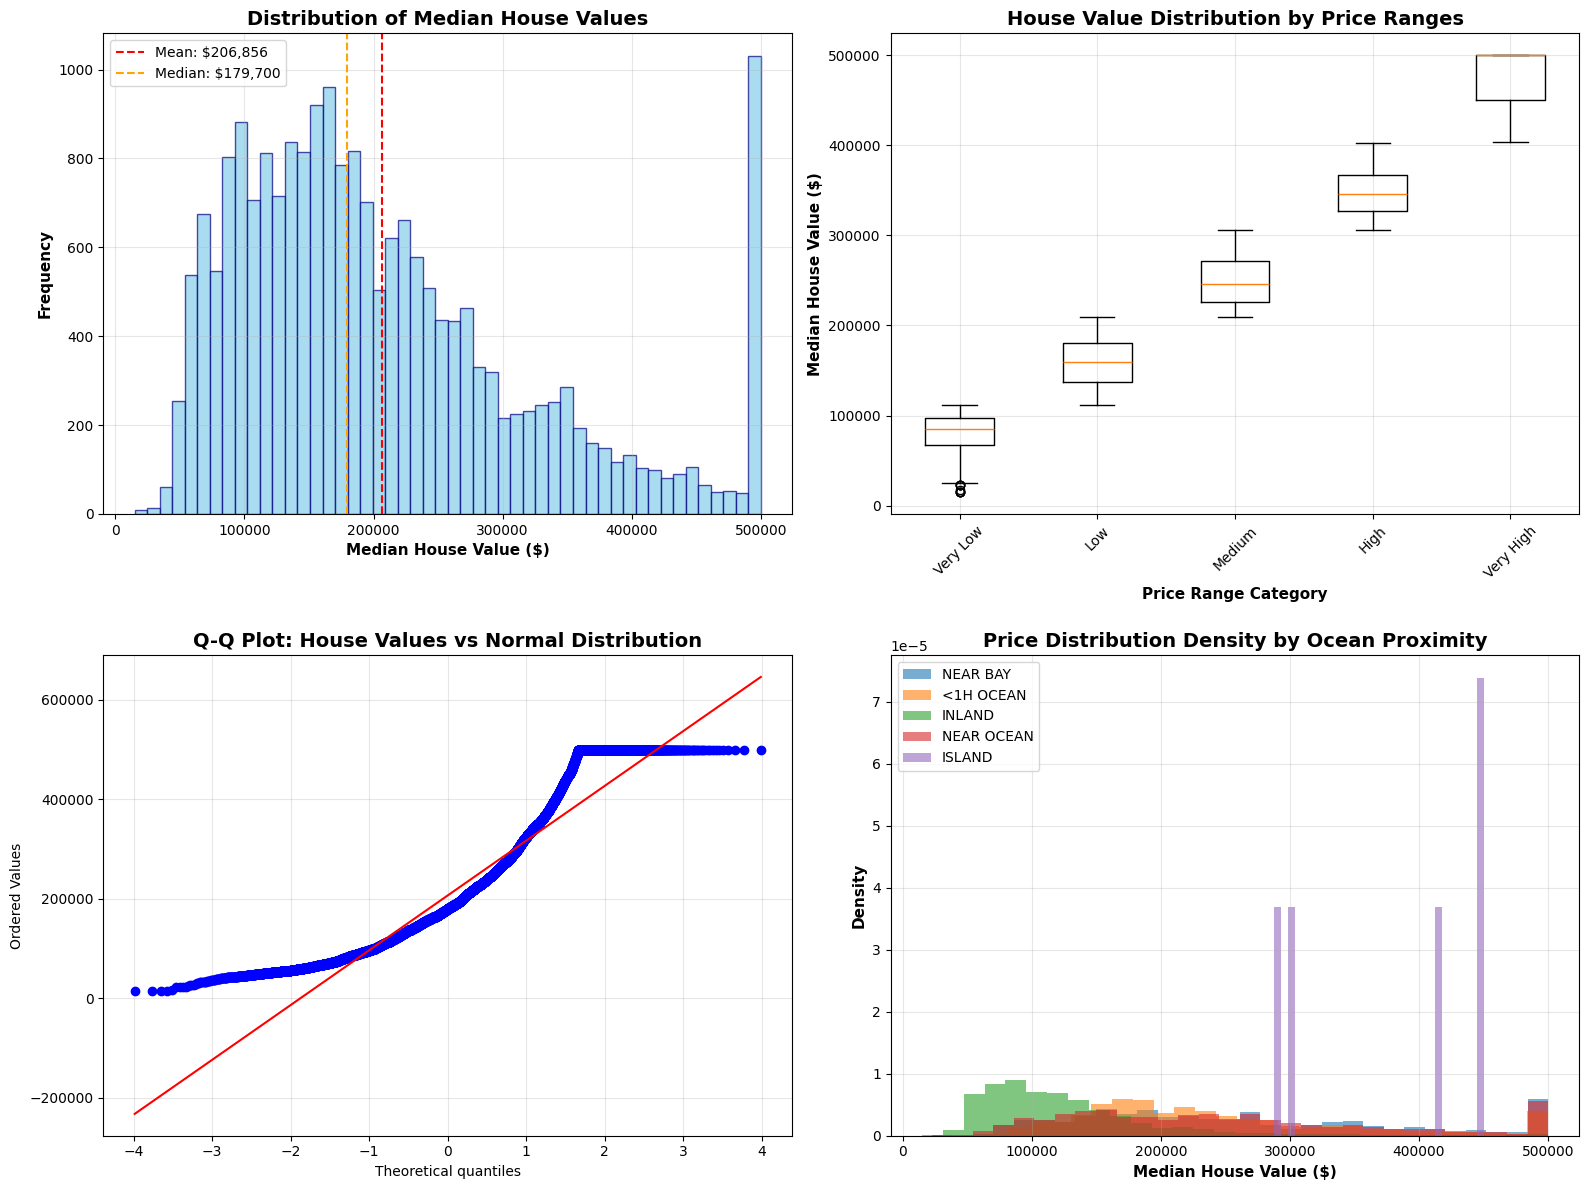

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Distribution of target variable
ax1.hist(df_housing['median_house_value'], bins=50, color='skyblue', 
         alpha=0.7, edgecolor='navy', linewidth=1)
ax1.set_xlabel('Median House Value ($)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax1.set_title('Distribution of Median House Values', fontsize=14, fontweight='bold')
ax1.axvline(df_housing['median_house_value'].mean(), color='red', linestyle='--', 
           label=f'Mean: ${df_housing["median_house_value"].mean():,.0f}')
ax1.axvline(df_housing['median_house_value'].median(), color='orange', linestyle='--',
           label=f'Median: ${df_housing["median_house_value"].median():,.0f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot by price ranges
price_ranges = pd.cut(df_housing['median_house_value'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df_housing['price_range'] = price_ranges
ax2.boxplot([df_housing[df_housing['price_range'] == range_]['median_house_value'] 
            for range_ in ['Very Low', 'Low', 'Medium', 'High', 'Very High']], 
           labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
ax2.set_xlabel('Price Range Category', fontsize=11, fontweight='bold')
ax2.set_ylabel('Median House Value ($)', fontsize=11, fontweight='bold')
ax2.set_title('House Value Distribution by Price Ranges', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Q-Q plot for normality check
from scipy import stats
stats.probplot(df_housing['median_house_value'], dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot: House Values vs Normal Distribution', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Price density by ocean proximity
for proximity in df_housing['ocean_proximity'].unique():
    subset = df_housing[df_housing['ocean_proximity'] == proximity]
    ax4.hist(subset['median_house_value'], alpha=0.6, label=proximity, bins=30, density=True)

ax4.set_xlabel('Median House Value ($)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Density', fontsize=11, fontweight='bold')
ax4.set_title('Price Distribution Density by Ocean Proximity', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

This comprehensive target variable analysis shows median house values are right-skewed with a clear $500K ceiling effect. The Q-Q plot confirms non-normal distribution, while density plots reveal distinct price distributions for different ocean proximity categories.

## **4. Descriptive Analysis**

## **5. Conclusion**